# Resultados simulaciones

Se revisan los resultados de las simulaciones del modelo original de Brian Arthur, barriendo los parámetros `tamaño bolsa predictores` ($k$) y `conectividad` ($p$).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from DatosGraficos import *

## Simulaciones con 1 predictor variando conectividad:

**Obtener datos**

In [3]:
memorias = [9]
predictores = [1]
conectividades = ['0', '0.004', '0.008', '0.012', '0.03', '0.5']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-1-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-1-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-1-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-1-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.5
Cargando datos de archivo ./data/simulacion-9-1-0.5.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           1           1200      0       0       0        0   
1        9           1           1200      1       0       1       -1   
2        9           1           1200      2       0       0        0   
3        9           1  

Conectividad  Memoria  Num_predic  Identificador  Ronda  Agente  Estado  \
0           0.0        9           1           1200      0       0       0   
1           0.0        9           1           1200      1       0       1   
2           0.0        9           1           1200      2       0       0   
3           0.0        9           1           1200      3       0       1   
4           0.0        9           1           1200      4       0       0   

   Puntaje    Politica  Prediccion  Precision Espejo  
0        0  18-ciclico          43        NaN     No  
1       -1  18-ciclico         100      57.00     No  
2        0  18-ciclico          54      51.50     No  
3       -1  18-ciclico          77      42.00     No  
4        0  18-ciclico          54      37.25     No

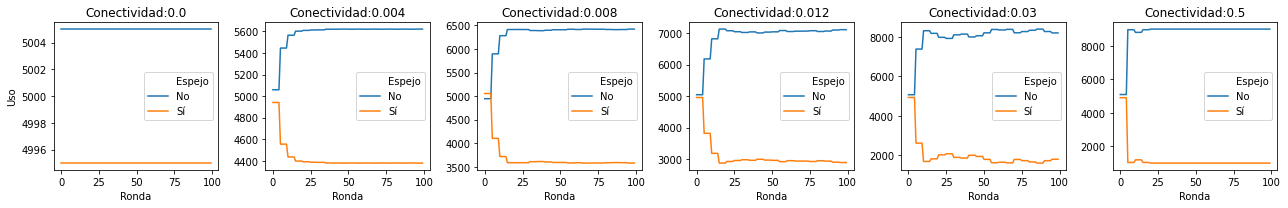

In [4]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    df_uso = df.groupby(['Ronda', 'Espejo'])['Politica'].count().reset_index(name='Uso')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Uso', hue='Espejo', data=df_uso, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

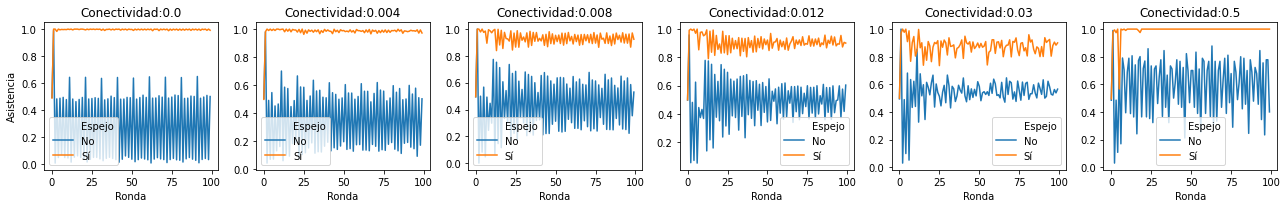

In [24]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    df = df.groupby(['Ronda', 'Espejo'])['Estado'].mean().reset_index(name='Asistencia')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Asistencia', data=df, hue='Espejo', ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


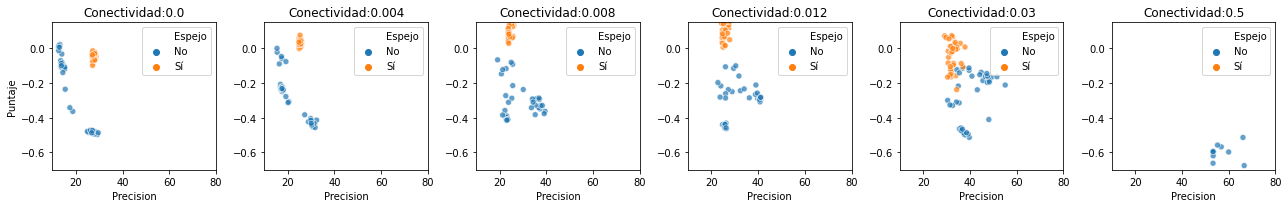

In [3]:
N = 6
data1 = pd.DataFrame(data[data['Ronda']>25])
conectividades = data1.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data1[data1['Conectividad']==float(c)])
    dfA = df.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean'}).reset_index()
    dfA['Espejo'] = dfA['Politica'].apply(lambda x: 'Sí' if 'espejo' in x else 'No')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision', y='Puntaje', hue='Espejo', data=dfA, ax=ax, alpha=0.7)
    ax.set_title("Conectividad:" + str(c))
    ax.set(xlim=(10, 80))    
    ax.set(ylim=(-.7, .15))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


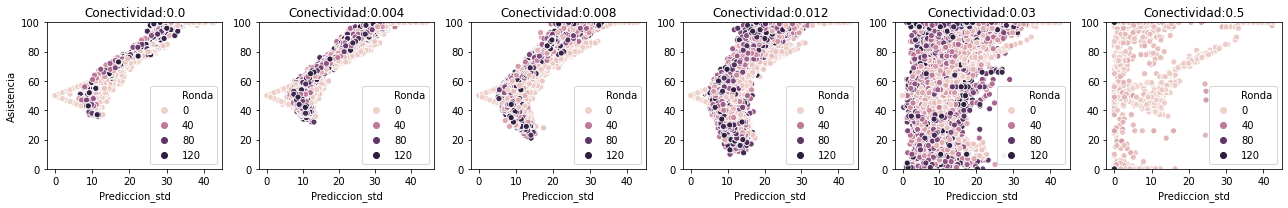

In [6]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


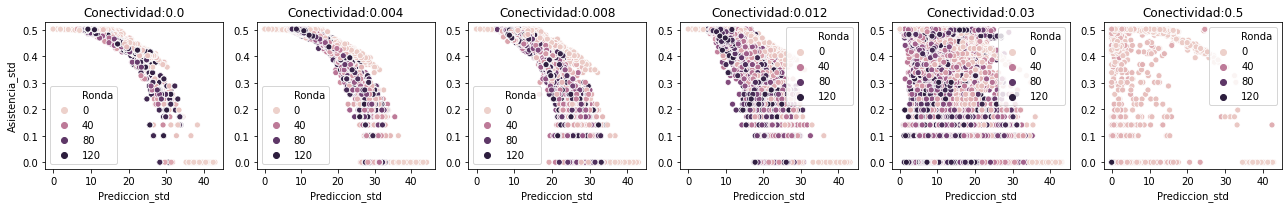

In [5]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'std'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Estado_std']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Estado_std', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
#    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()



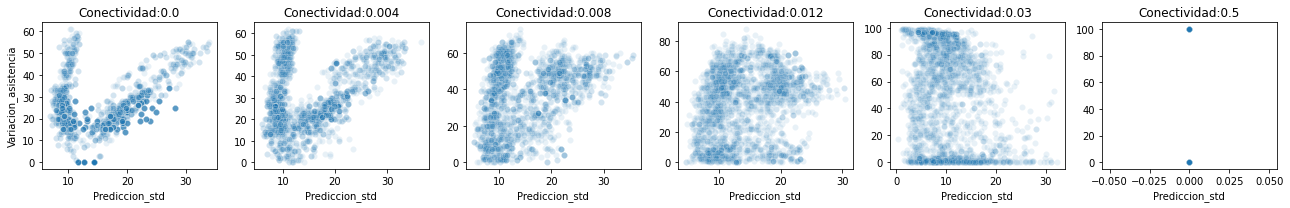

In [19]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
data1 = pd.DataFrame(data[data['Ronda']>75])
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data1[data1['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Asistencia']
    df.sort_values(by=['Identificador', 'Ronda'], inplace=True)
    df['Asistencia_lag'] = df.groupby('Identificador')['Asistencia'].transform('shift', 1)
    df['Variacion_asistencia'] = np.abs(df['Asistencia'] - df['Asistencia_lag'])
    ax = fig.add_subplot(1, N, int(num) + 1)
    #sns.scatterplot(x='Prediccion_std', y='Variacion_asistencia', hue='Ronda', data=df, ax=ax)
    sns.scatterplot(x='Prediccion_std', y='Variacion_asistencia', alpha=0.1, data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
#    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()




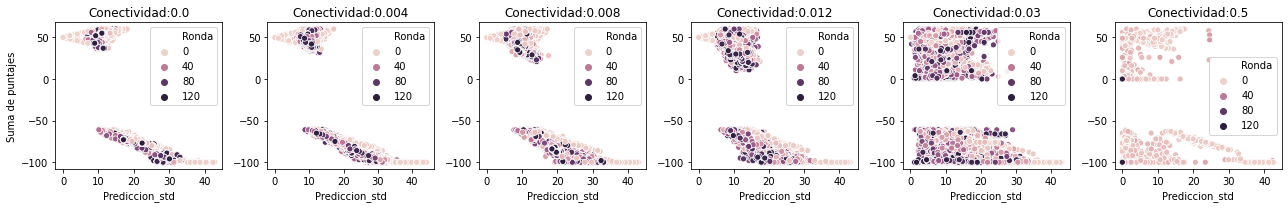

In [39]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


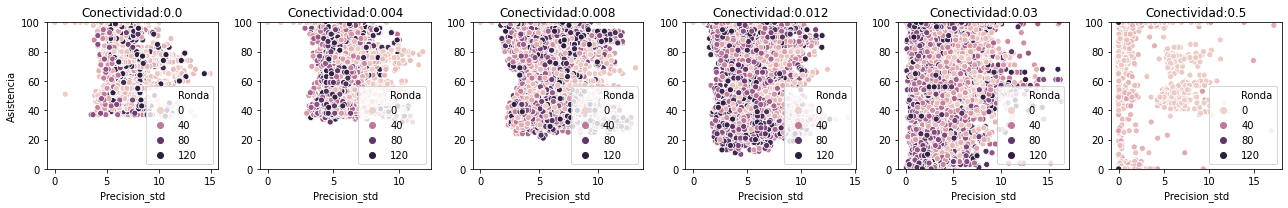

In [3]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


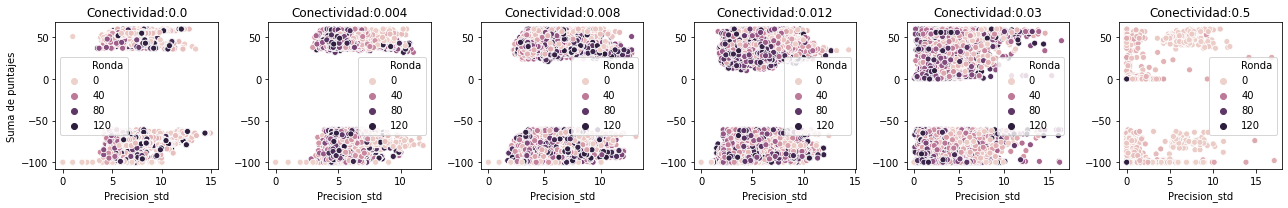

In [4]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


Si $p>\frac{\ln(n)}{n-1}$, el grafo es conectado

$n=100$, $\frac{\ln(100)}{99}\approx 0.046$

**Asistencia**

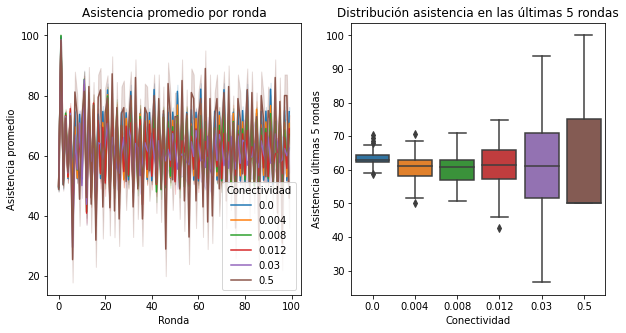

In [7]:
dibuja_asistencia_vs(data, 'Conectividad')

#### Recompensa total

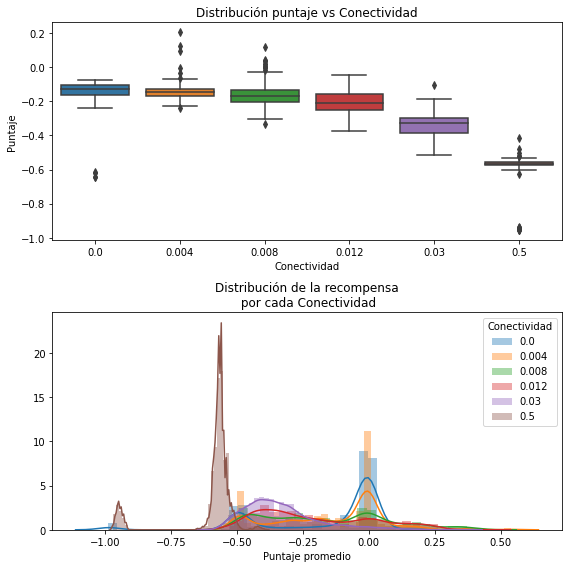

In [8]:
dibujar_puntaje_vs(data, 'Conectividad')

**Uso de políticas**

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


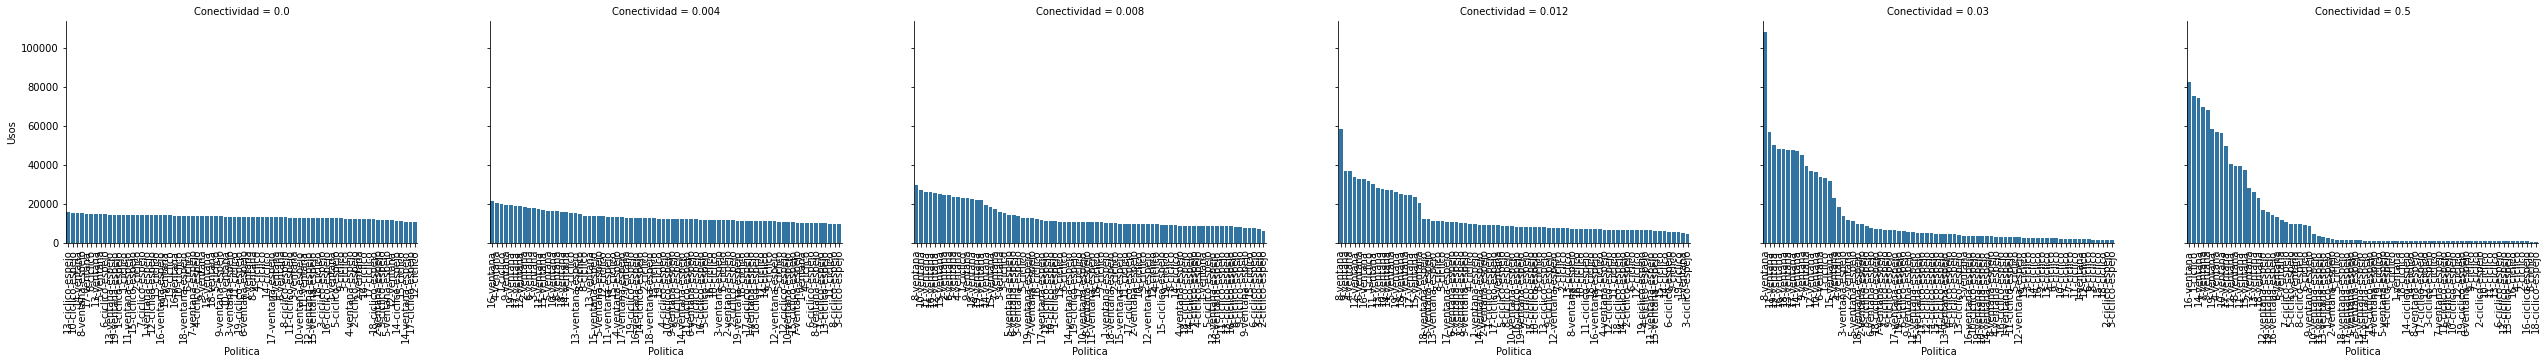

In [9]:
dibuja_usopredictores_vs(data, 'Conectividad')

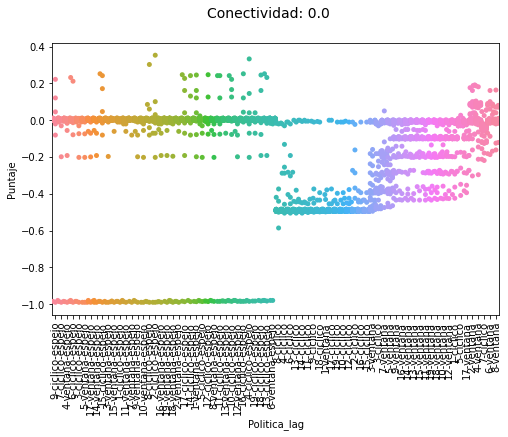

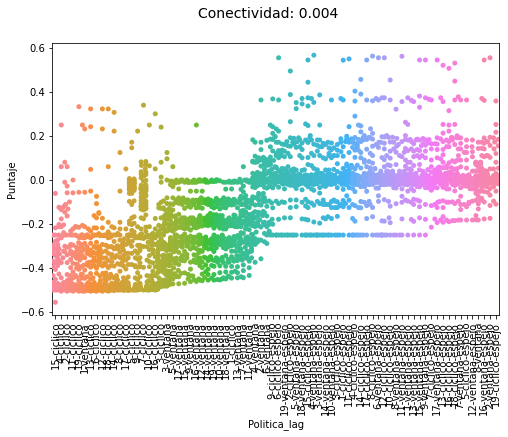

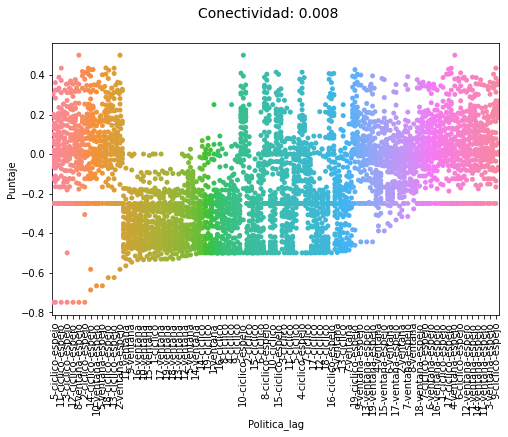

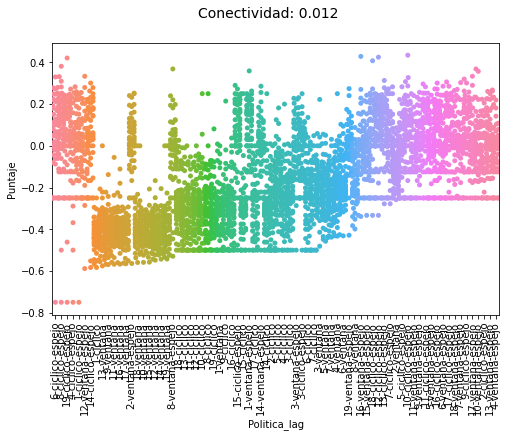

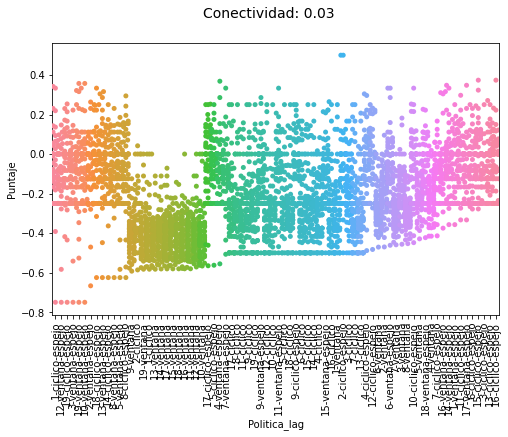

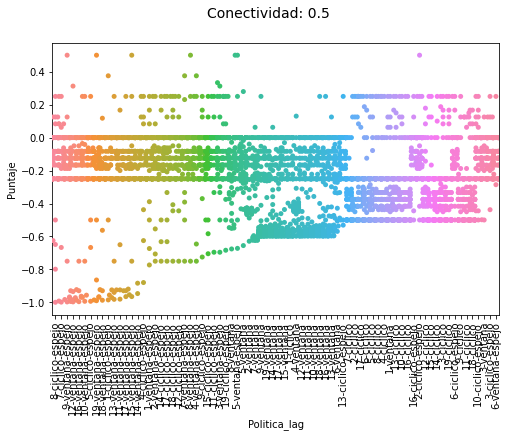

In [10]:
dibuja_puntajepredictor_vs(data, 'Conectividad')

## Simulaciones con 3 predictores variando conectividad:

**Obtener datos**

In [4]:
memorias = [9]
predictores = [3]
conectividades = ['0', '0.004', '0.008', '0.012', '0.03', '0.5']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 3 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-3-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-3-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-3-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-3-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-3-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 3 y conectividad 0.5
Cargando datos de archivo ./data/simulacion-9-3-0.5.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           3           1400      0       0       0        0   
1        9           3           1400      1       0       1       -1   
2        9           3           1400      2       0       1       -1   
3        9           3  

Conectividad  Memoria  Num_predic  Identificador  Ronda  Agente  Estado  \
0           0.0        9           3           1400      0       0       0   
1           0.0        9           3           1400      1       0       1   
2           0.0        9           3           1400      2       0       1   
3           0.0        9           3           1400      3       0       0   
4           0.0        9           3           1400      4       0       1   

   Puntaje          Politica  Prediccion  Precision Espejo  
0        0  2-ciclico-espejo          54        NaN     Sí  
1       -1  2-ciclico-espejo           0       46.0     Sí  
2       -1        13-ciclico          88       33.0     No  
3        0        13-ciclico          16       46.0     No  
4       -1  2-ciclico-espejo          33       44.0     Sí

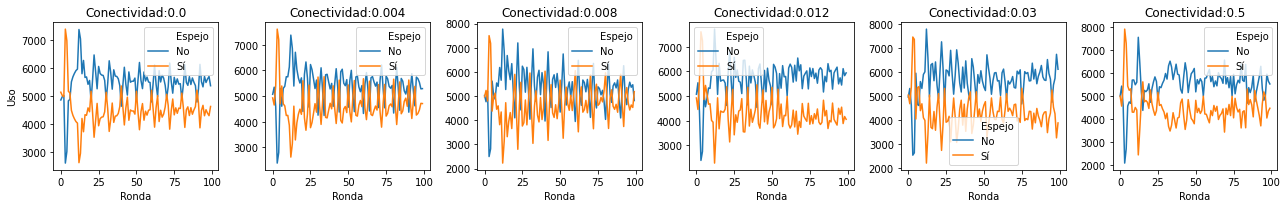

In [12]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    df_uso = df.groupby(['Ronda', 'Espejo'])['Politica'].count().reset_index(name='Uso')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Uso', hue='Espejo', data=df_uso, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

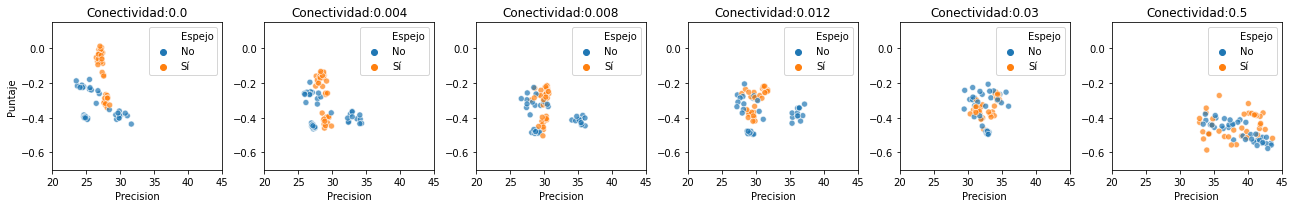

In [5]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    dfA = df.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean'}).reset_index()
    dfA['Espejo'] = dfA['Politica'].apply(lambda x: 'Sí' if 'espejo' in x else 'No')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision', y='Puntaje', hue='Espejo', data=dfA, ax=ax, alpha=0.7)
    ax.set_title("Conectividad:" + str(c))
    ax.set(xlim=(20, 45))
    ax.set(ylim=(-.7, .15))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


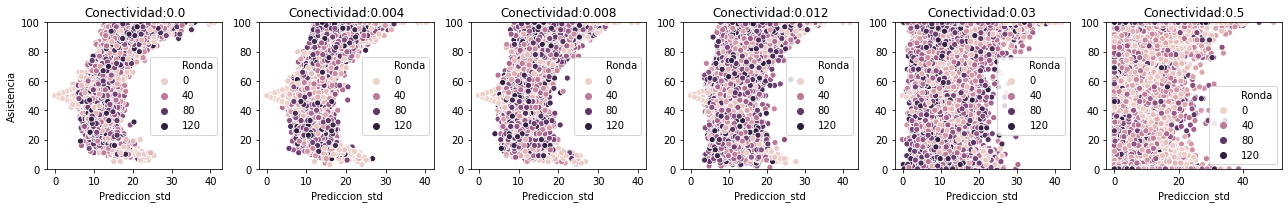

In [14]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


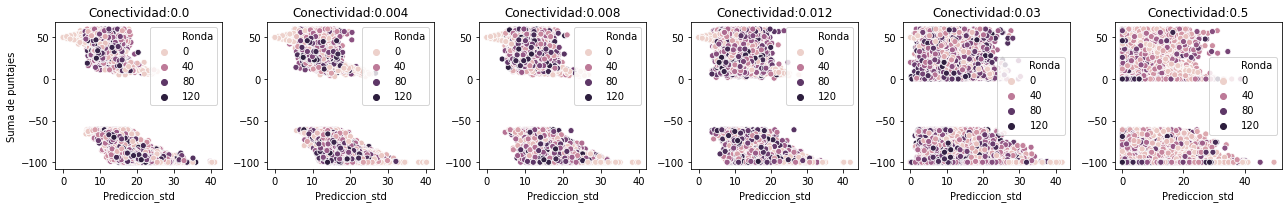

In [37]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


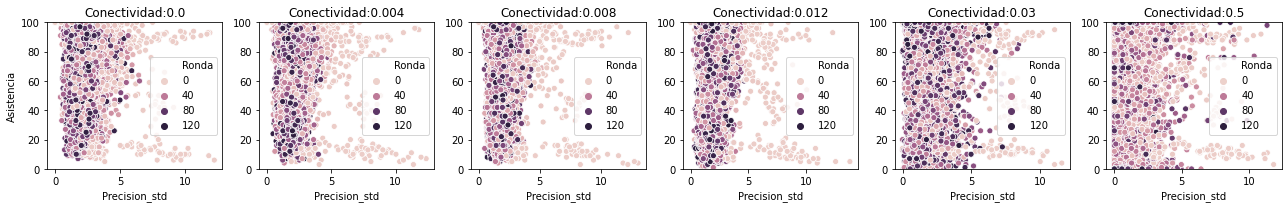

In [6]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


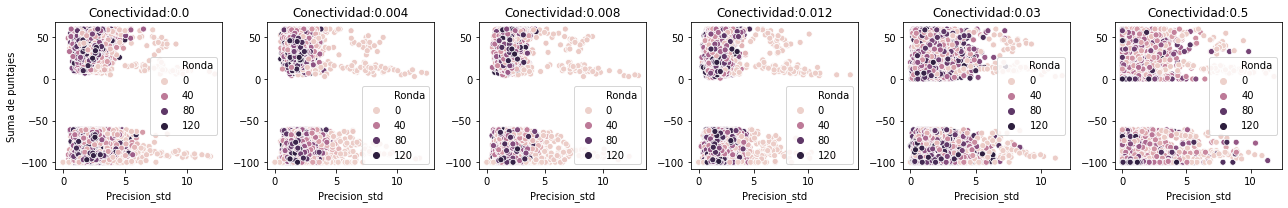

In [7]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


**Asistencia**

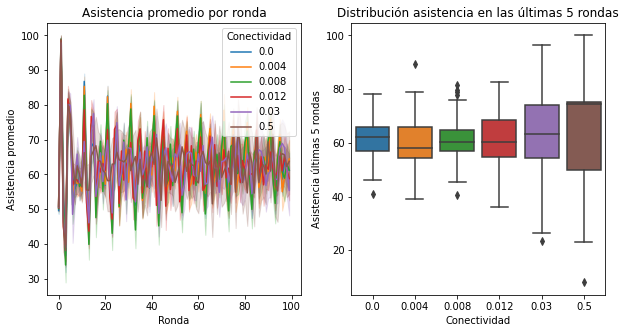

In [15]:
dibuja_asistencia_vs(data, 'Conectividad')

#### Recompensa total

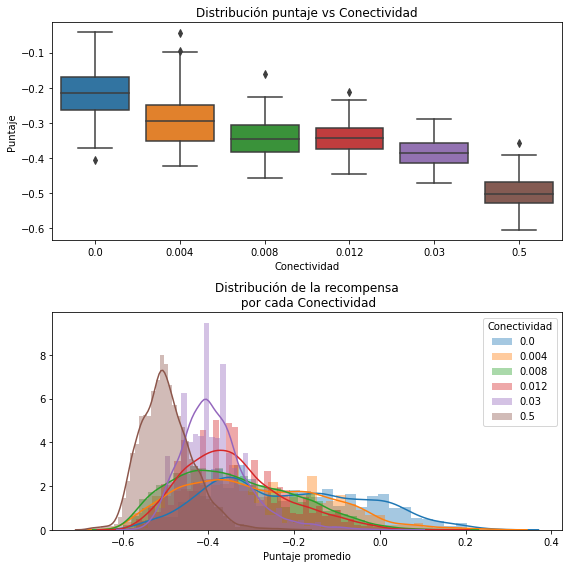

In [16]:
dibujar_puntaje_vs(data, 'Conectividad')

**Uso de políticas**

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


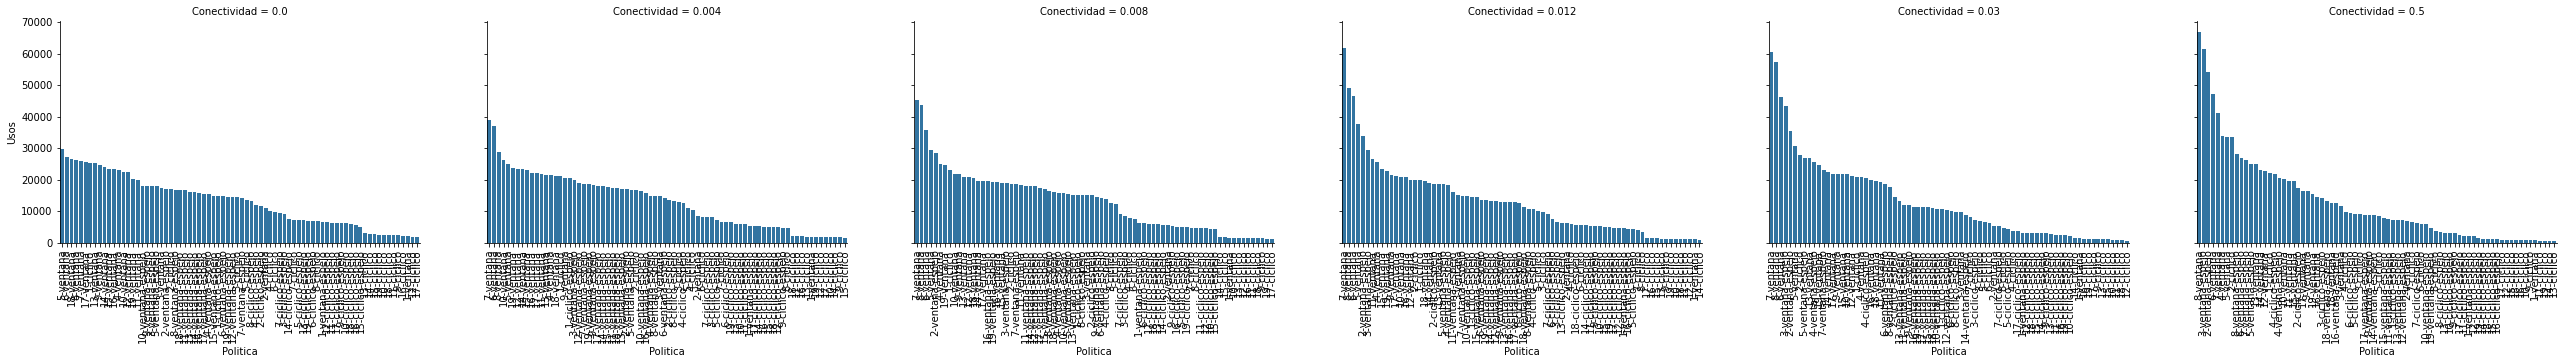

In [17]:
dibuja_usopredictores_vs(data, 'Conectividad')

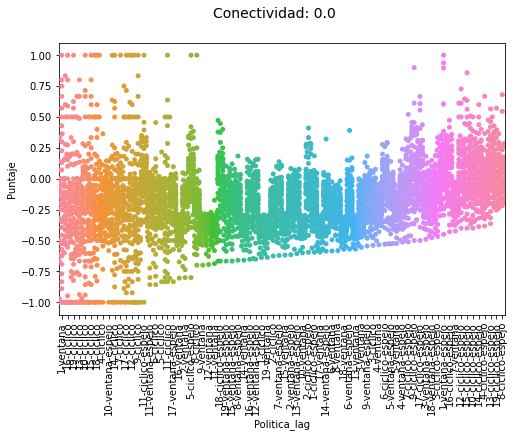

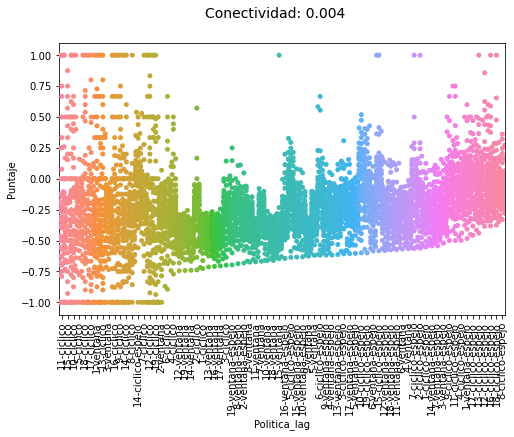

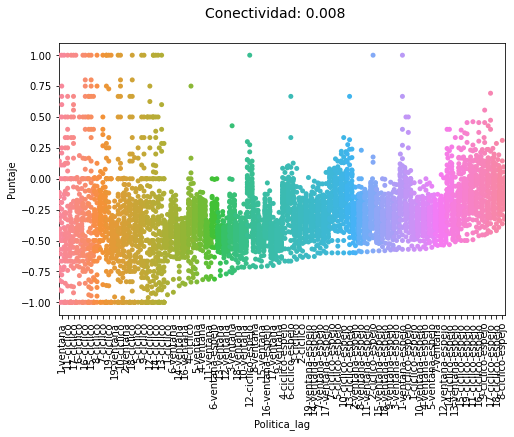

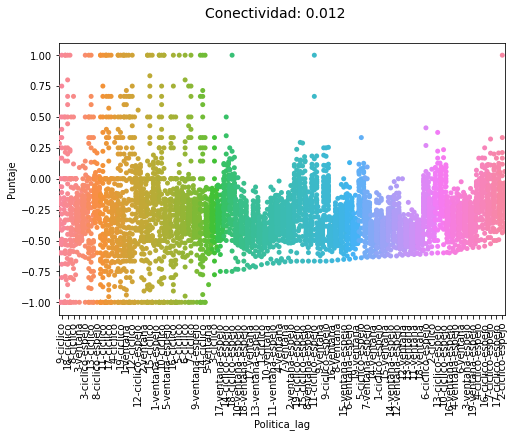

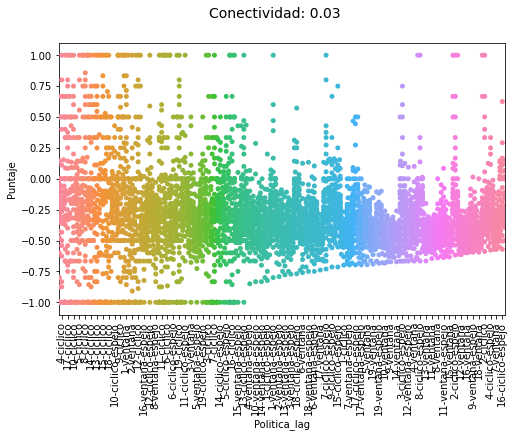

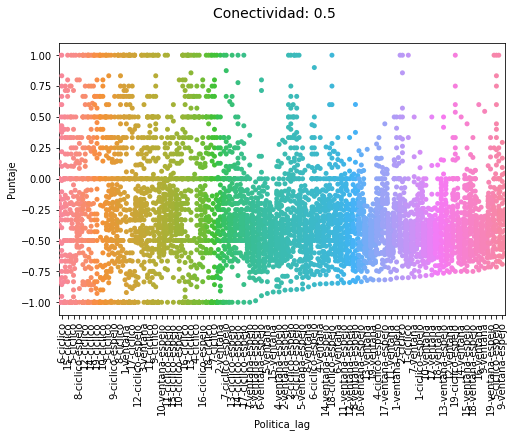

In [18]:
dibuja_puntajepredictor_vs(data, 'Conectividad')

## Simulaciones con 6 predictores variando conectividad:

**Obtener datos**

In [19]:
memorias = [9]
predictores = [6]
conectividades = ['0', '0.004', '0.008', '0.012', '0.03', '0.5']
data = leer_datos(memorias, predictores, conectividades)
data.head()

Leyendo datos sweep memoria 9 predictores 6 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-6-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-6-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-6-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-6-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-6-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 6 y conectividad 0.5
Cargando datos de archivo ./data/simulacion-9-6-0.5.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           6           1600      0       0       0        0   
1        9           6           1600      1       0       1       -1   
2        9           6           1600      2       0       0        0   
3        9           6  

Conectividad  Memoria  Num_predic  Identificador  Ronda  Agente  Estado  \
0           0.0        9           6           1600      0       0       0   
1           0.0        9           6           1600      1       0       1   
2           0.0        9           6           1600      2       0       0   
3           0.0        9           6           1600      3       0       1   
4           0.0        9           6           1600      4       0       1   

   Puntaje          Politica  Prediccion  Precision  
0        0         1-ventana          52        NaN  
1       -1         1-ventana         100  48.000000  
2        0  5-ventana-espejo          50  38.000000  
3        1  5-ventana-espejo          60  39.333333  
4       -1  5-ventana-espejo          56  30.500000

**Asistencia**

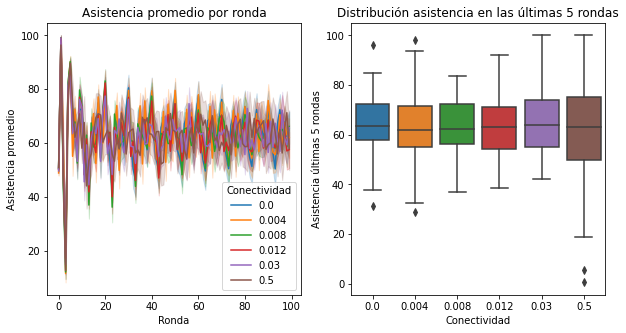

In [20]:
dibuja_asistencia_vs(data, 'Conectividad')

#### Recompensa total

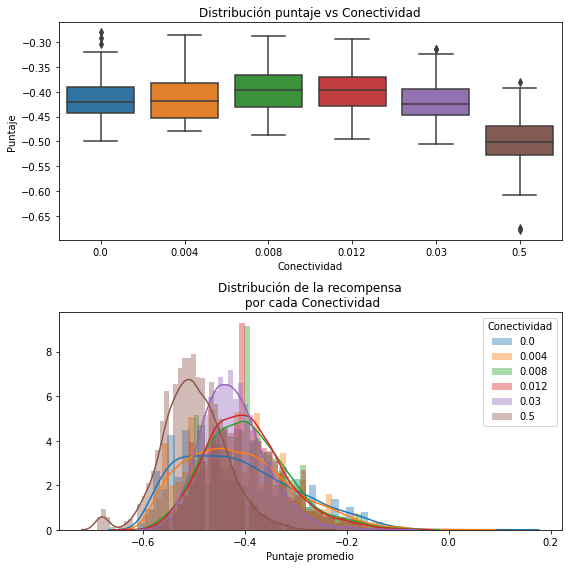

In [21]:
dibujar_puntaje_vs(data, 'Conectividad')

**Uso de políticas**

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


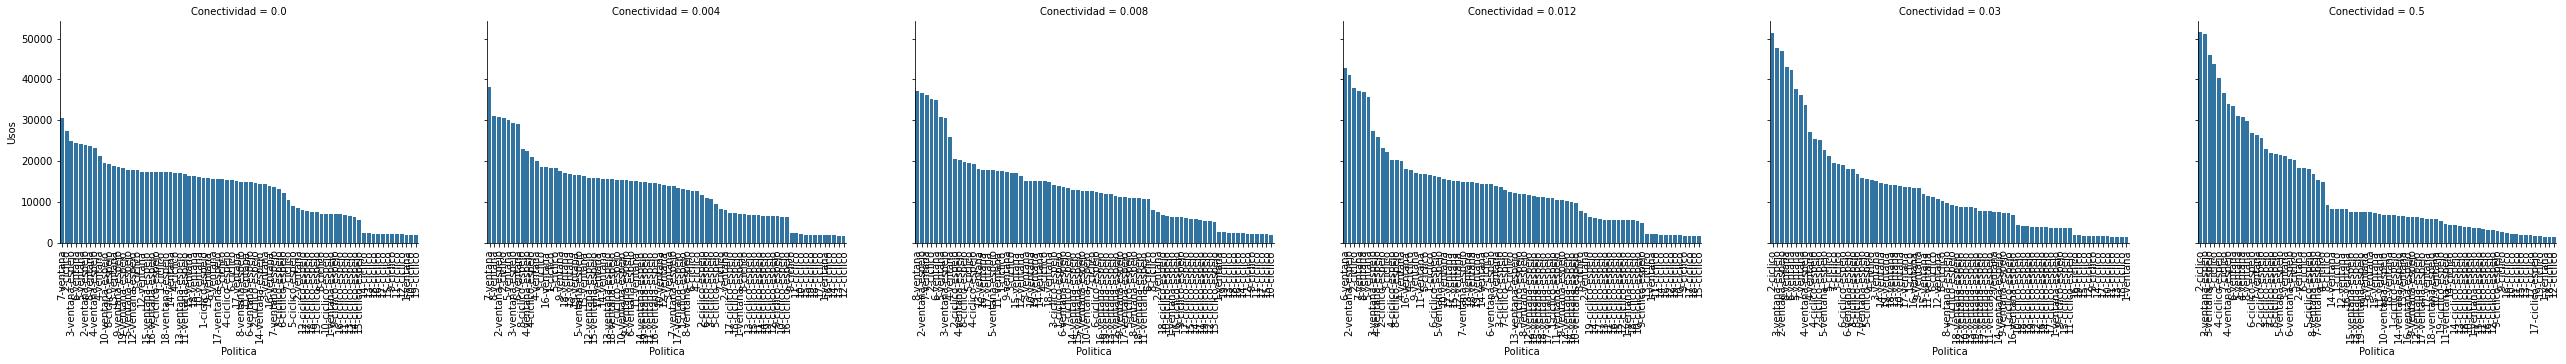

In [22]:
dibuja_usopredictores_vs(data, 'Conectividad')

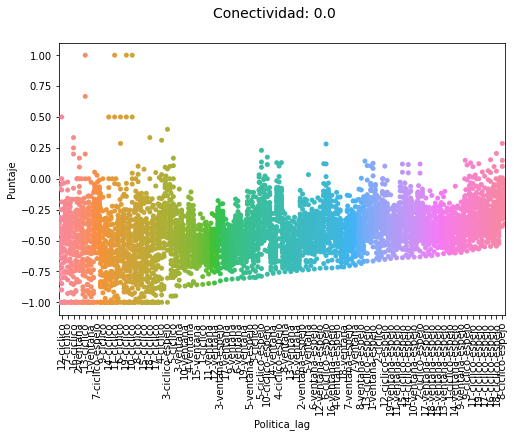

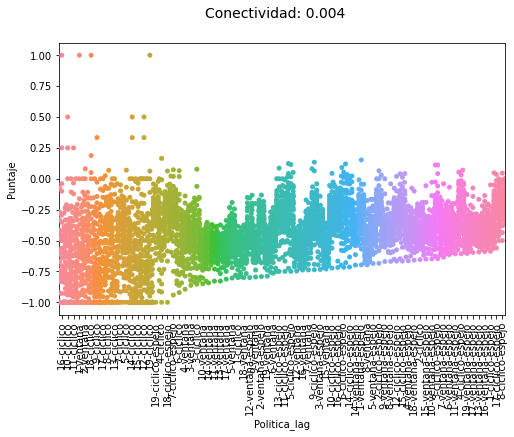

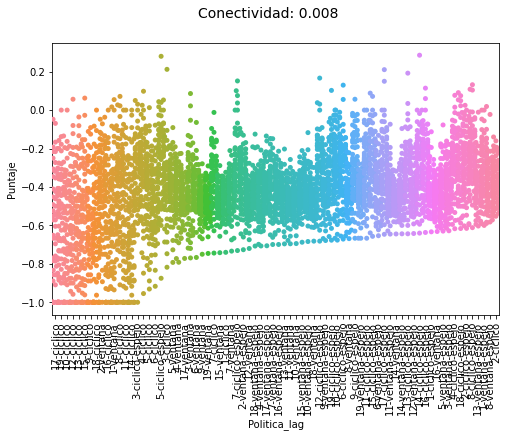

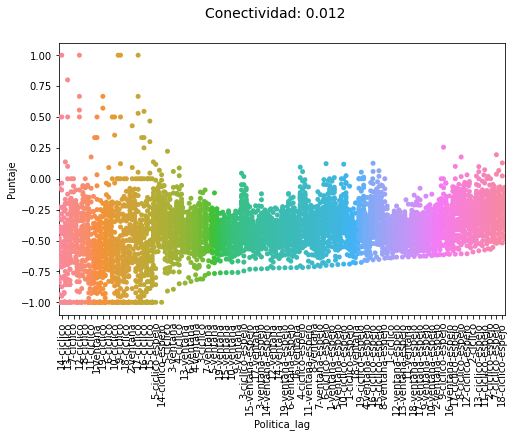

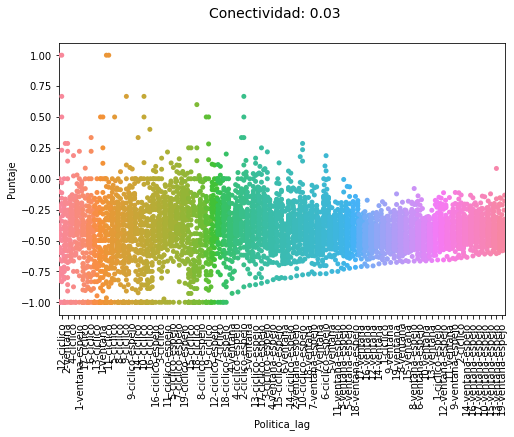

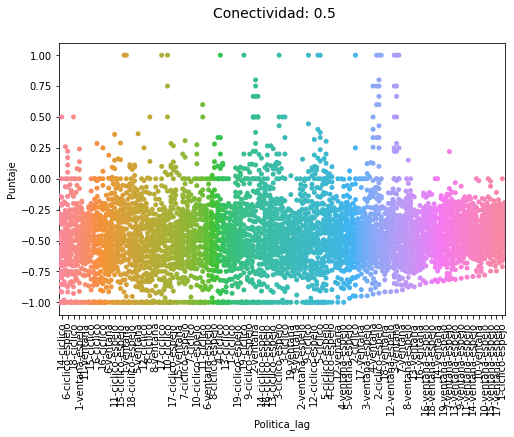

In [23]:
dibuja_puntajepredictor_vs(data, 'Conectividad')

## Simulaciones con 9 predictores variando conectividad:

**Obtener datos**

In [25]:
memorias = [9]
predictores = [9]
conectividades = ['0', '0.004', '0.008', '0.012', '0.03', '0.5']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 9 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-9-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-9-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-9-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-9-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-9-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 9 y conectividad 0.5
Cargando datos de archivo ./data/simulacion-9-9-0.5.csv...
Listo
Preparando dataframe...
   Memoria  Num_predic  Identificador  Ronda  Agente  Estado  Puntaje  \
0        9           9           1800      0       0       0        0   
1        9           9           1800      1       0       1       -1   
2        9           9           1800      2       0       1       -1   
3        9           9  

Conectividad  Memoria  Num_predic  Identificador  Ronda  Agente  Estado  \
0           0.0        9           9           1800      0       0       0   
1           0.0        9           9           1800      1       0       1   
2           0.0        9           9           1800      2       0       1   
3           0.0        9           9           1800      3       0       0   
4           0.0        9           9           1800      4       0       1   

   Puntaje           Politica  Prediccion  Precision Espejo  
0        0         19-ciclico          46        NaN     No  
1       -1   3-ciclico-espejo           0  46.000000     Sí  
2       -1          9-ciclico          99  27.500000     No  
3        0  15-ventana-espejo          39  45.666667     Sí  
4       -1   3-ciclico-espejo           8  38.250000     Sí

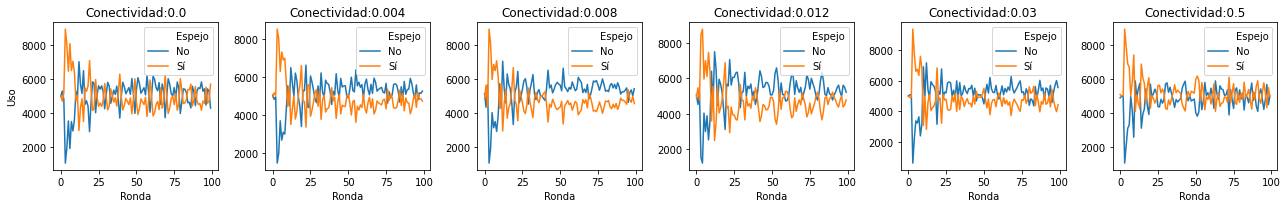

In [9]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    df_uso = df.groupby(['Ronda', 'Espejo'])['Politica'].count().reset_index(name='Uso')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Uso', hue='Espejo', data=df_uso, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()

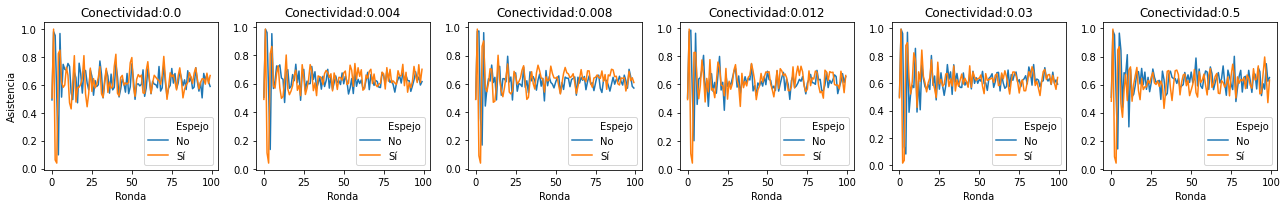

In [26]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    df = df.groupby(['Ronda', 'Espejo'])['Estado'].mean().reset_index(name='Asistencia')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.lineplot(x='Ronda', y='Asistencia', data=df, hue='Espejo', ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


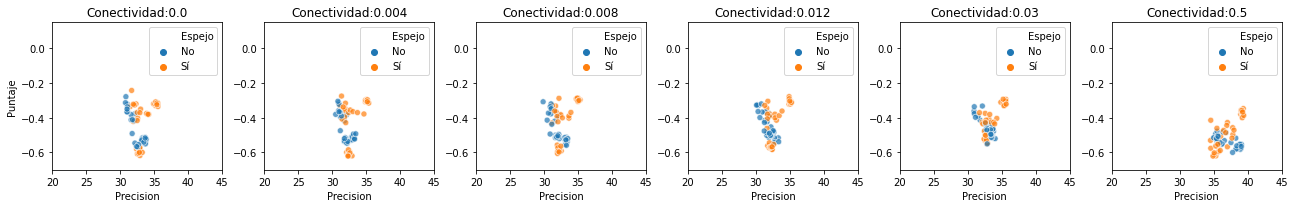

In [10]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==float(c)])
    dfA = df.groupby('Politica').agg({'Precision':'mean', 'Puntaje':'mean'}).reset_index()
    dfA['Espejo'] = dfA['Politica'].apply(lambda x: 'Sí' if 'espejo' in x else 'No')
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision', y='Puntaje', hue='Espejo', data=dfA, ax=ax, alpha=0.7)
    ax.set_title("Conectividad:" + str(c))
    ax.set(xlim=(20, 45))
    ax.set(ylim=(-.7, .15))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


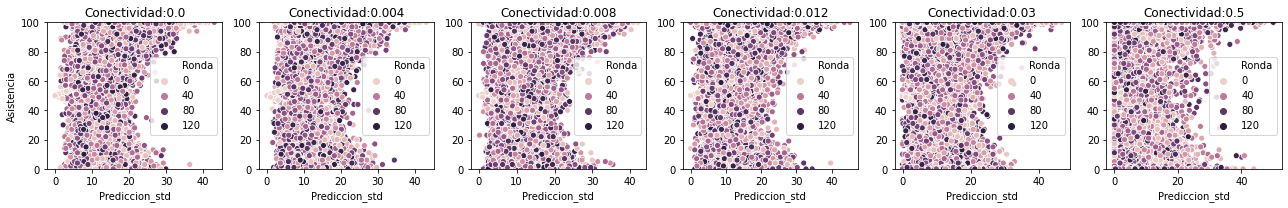

In [11]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


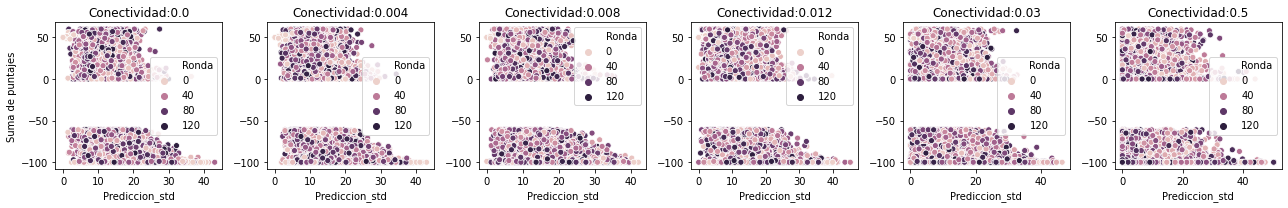

In [12]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Prediccion':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Prediccion_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Prediccion_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


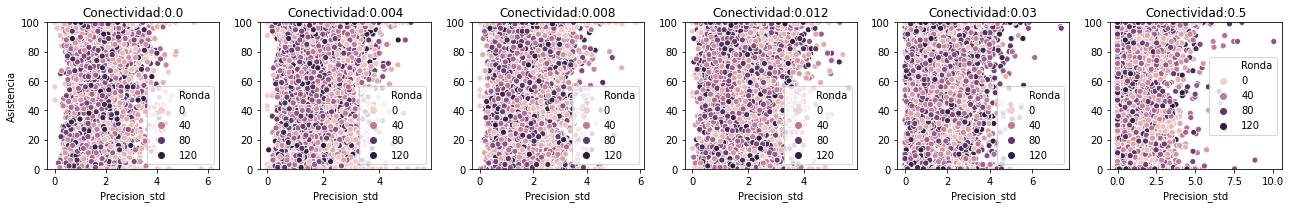

In [13]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Estado':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Asistencia']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Asistencia', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    ax.set(ylim=(0, 100))
    if num > 0:
        ax.set_ylabel('')

fig.tight_layout()


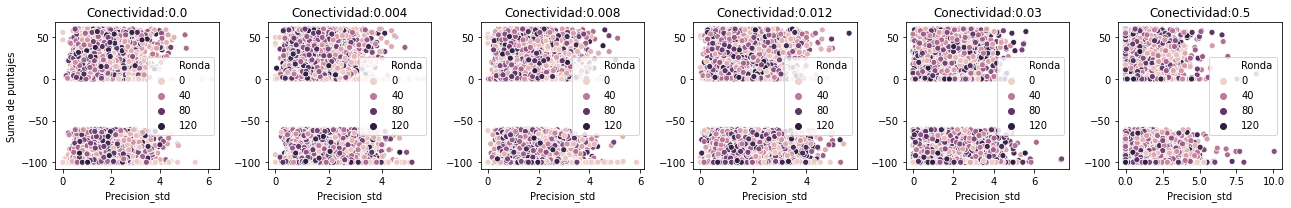

In [14]:
N = 6
conectividades = data.Conectividad.unique().tolist()[:N]
fig = plt.figure(figsize=(3*N,3))
for num, c in enumerate(conectividades):
    df = pd.DataFrame(data[data['Conectividad']==c])
    df = df.groupby(['Identificador', 'Ronda']).agg({'Precision':'std', 'Puntaje':'sum'}).reset_index()
    df.columns = ['Identificador', 'Ronda', 'Precision_std', 'Puntaje']
    ax = fig.add_subplot(1, N, int(num) + 1)
    sns.scatterplot(x='Precision_std', y='Puntaje', hue='Ronda', data=df, ax=ax)
    ax.set_title("Conectividad:" + str(c))
    if num == 0:
        ax.set_ylabel('Suma de puntajes')
    else:
        ax.set_ylabel('')

fig.tight_layout()


**Asistencia**

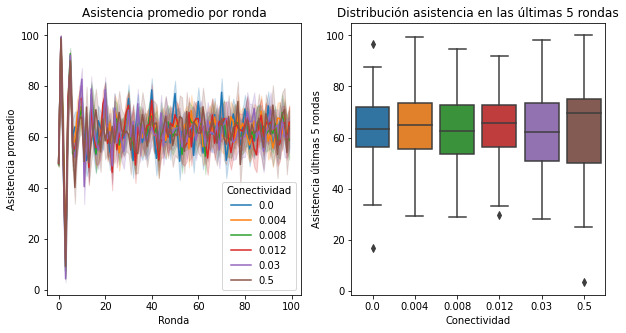

In [25]:
dibuja_asistencia_vs(data, 'Conectividad')

#### Recompensa total

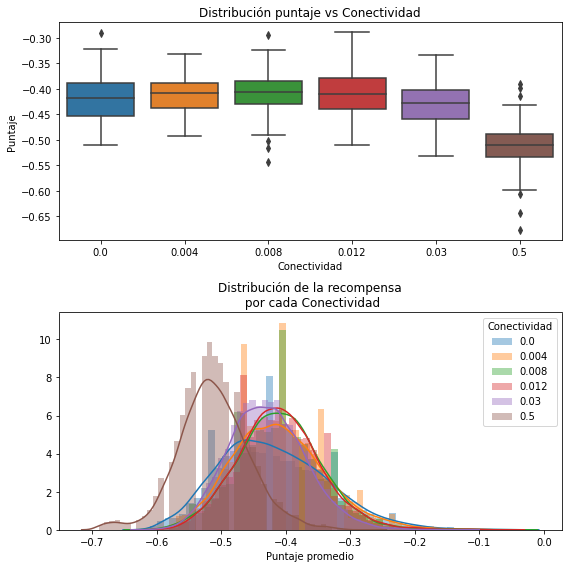

In [26]:
dibujar_puntaje_vs(data, 'Conectividad')

**Uso de políticas**

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


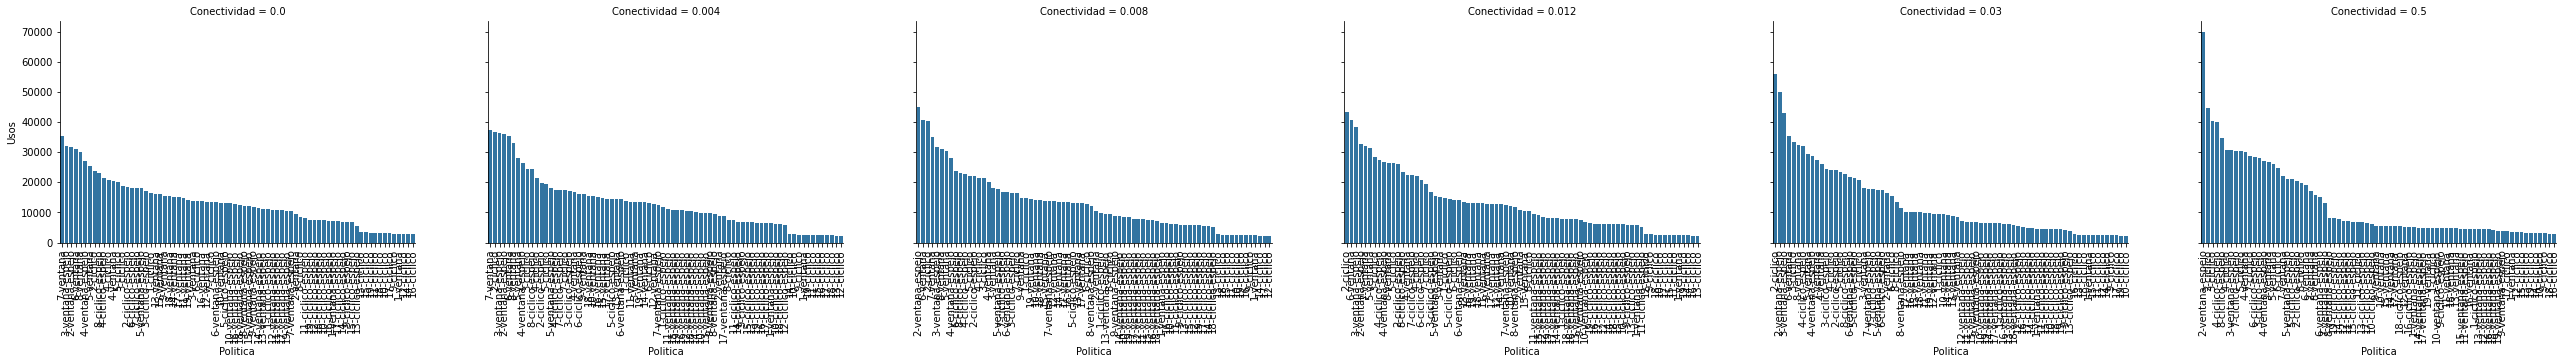

In [27]:
dibuja_usopredictores_vs(data, 'Conectividad')

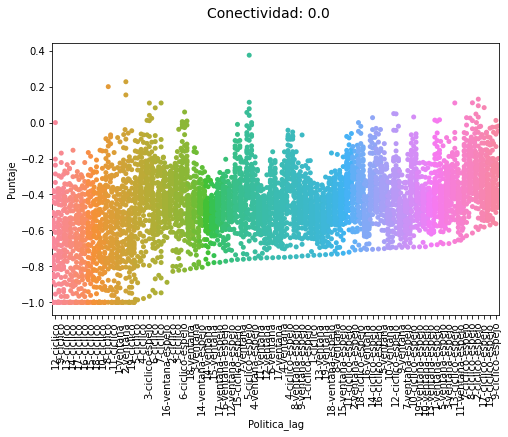

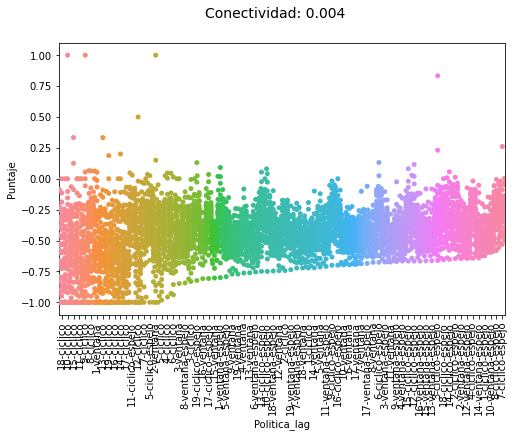

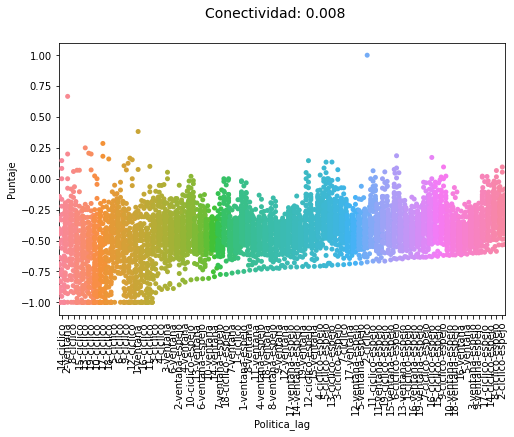

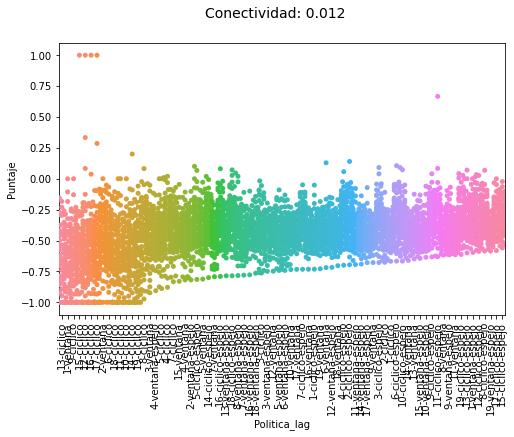

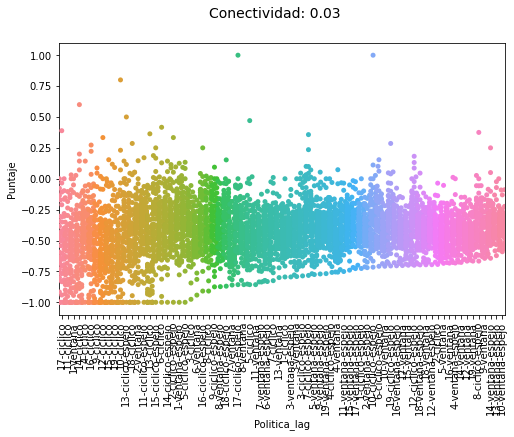

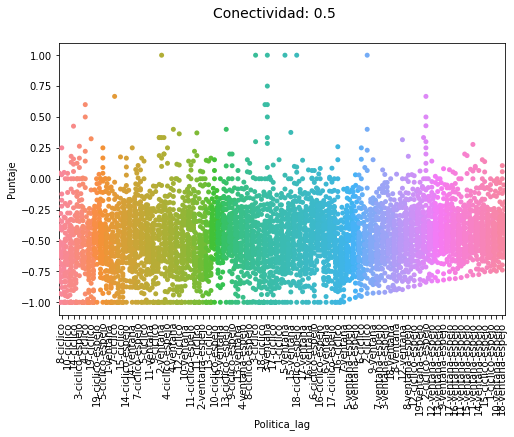

In [28]:
dibuja_puntajepredictor_vs(data, 'Conectividad')

In [4]:
memorias = [9]
predictores = [1]
conectividades = ['0', '0.004', '0.006', '0.008', '0.01', '0.012', '0.03', '0.05', '0.1', '0.5', '1']
data = leer_datos(memorias, predictores, conectividades)
data['Espejo'] = data['Politica'].apply(lambda x: 'Sí' if 'espejo'in x else 'No')
data.head()

Leyendo datos sweep memoria 9 predictores 1 y conectividad 0
Cargando datos de archivo ./data/simulacion-9-1-0.csv...


/Users/edgar/Repositorios/ElFarolArthur/DatosGraficos.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Memoria' in aux['Memoria'].unique():


Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.004
Cargando datos de archivo ./data/simulacion-9-1-0.004.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.006
Cargando datos de archivo ./data/simulacion-9-1-0.006.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.008
Cargando datos de archivo ./data/simulacion-9-1-0.008.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.01
Cargando datos de archivo ./data/simulacion-9-1-0.01.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.012
Cargando datos de archivo ./data/simulacion-9-1-0.012.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.03
Cargando datos de archivo ./data/simulacion-9-1-0.03.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.05
Cargando datos de archivo ./data/simulacion-9-1-0.05.csv...
Listo
Leyendo datos sweep memoria 9 predictores 1 y conectividad 0.1
Cargando dato

Conectividad  Memoria  Num_predic  Identificador  Ronda  Agente  Estado  \
0           0.0        9           1           1200      0       0       0   
1           0.0        9           1           1200      1       0       1   
2           0.0        9           1           1200      2       0       0   
3           0.0        9           1           1200      3       0       1   
4           0.0        9           1           1200      4       0       0   

   Puntaje    Politica  Prediccion  Precision Espejo  
0        0  18-ciclico          43        NaN     No  
1       -1  18-ciclico         100      57.00     No  
2        0  18-ciclico          54      51.50     No  
3       -1  18-ciclico          77      42.00     No  
4        0  18-ciclico          54      37.25     No

In [5]:
data1 = pd.DataFrame(data[data['Ronda']>25] & data[data[]

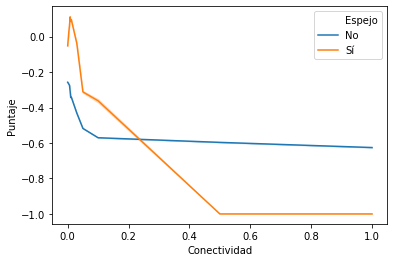

In [6]:
sns.lineplot(x='Conectividad', y='Puntaje', hue='Espejo', data=data1)